# Машинное обучение, ФКН ВШЭ

## Практическое задание 2. Exploratory Data Analysis и линейная регрессия

### Общая информация
Дата выдачи: 12.10.2024

Мягкий дедлайн: 23:59MSK 27.10.2024

Жесткий дедлайн: 23:59MSK 31.10.2024

### О задании
В этом задании мы попытаемся научиться анализировать данные и выделять из них полезные признаки. Мы также научимся пользоваться `sklearn`, а заодно привыкнем к основным понятиям машинного обучения.

### Оценивание и штрафы
Каждая из задач имеет определенную «стоимость» (указана в скобках около задачи). Максимально допустимая оценка за работу — 10 баллов. Проверяющий имеет право снизить оценку за неэффективную реализацию или неопрятные графики.

**Обратите внимание**, что в каждом разделе домашнего задания есть оцениваниемые задачи и есть вопросы. Вопросы дополняют задачи и направлены на то, чтобы проинтерпретировать или обосновать происходящее. Код без интерпретации не имеет смысла, поэтому отвечать на вопросы обязательно — за отсутствие ответов мы будем снижать баллы за задачи. Если вы ответите на вопросы, но не напишете корректный код к соответствующим оцениваемым задачам, то баллы за такое выставлены не будут.

Задание выполняется самостоятельно. «Похожие» решения считаются плагиатом и все задействованные студенты (в том числе те, у кого списали) не могут получить за него больше 0 баллов (подробнее о плагиате см. на странице курса). Если вы нашли решение какого-то из заданий (или его часть) в открытом источнике, необходимо указать ссылку на этот источник в отдельном блоке в конце вашей работы (скорее всего вы будете не единственным, кто это нашел, поэтому чтобы исключить подозрение в плагиате, необходима ссылка на источник).

### Формат сдачи
Задания сдаются через систему Anytask. Инвайт можно найти на странице курса. Присылать необходимо ноутбук с выполненным заданием. Сам ноутбук называйте в формате homework-practice-02-linregr-Username.ipynb, где Username — ваша фамилия.

Для удобства проверки самостоятельно посчитайте свою максимальную оценку (исходя из набора решенных задач) и укажите ниже.

Оценка: 10.

В этом ноутбуке используется библиотека `folium` для визуализации карт. Она работает в google colab!

In [1]:
!pip install folium

In [2]:
import folium

m = folium.Map(location=(50.97178, 9.79418), zoom_start=15)

m

Если вы всё сделали правильно, то выше должна открыться карта

### 📌 **Памятка по дз2**

Обрабатывать данные можно любым способом (`polars`, `pandas`, `pyspark`, ...), который вам нравится и запускается в ноутбуке, и любой библиотекой для визуализации (`matplotlib`, `seaborn`, `plotly`, ...). Пользуйтесь на здоровье, но!

> Учтите, что `polars` всё ещё молодой и не все библиотеки его поддерживают. `sklearn` во многом уже работает, но на всякий случай не стесняйтесь пользоваться методами `pl.DataFrame.to_pandas()` или `pl.DataFrame.to_numpy()`    

> Впрочем, `pandas` тоже не лишён проблем. `sklearn` принимает `pd.DataFrame` почти везде, проблемы очень редки, но если вдруг возникнет какая-то беда с шейпами, или ещё какой-нибудь казус, а вы уверены, что всё правильно, пользуйтесь `pd.DataFrame.to_numpy()`. Это не всегда решает проблему, но часто помогает понять, что на самом деле не так. При желании можно передавать и `Iterable`, и sparse-матрицы

> Графики должны быть понятные, читаемые и пр. Консультируйтесь с памяткой из дз1 в задании на график

> Для воспроизводимости результатов не забывайте пользоваться `np.random.seed(...)`, при необходимости чистите мусор `gc.collect()`, лучше в каждой ячейке

> Все результаты должны быть получены в ноутбуке. На каждый **Вопрос** долен быть дан **Ответ** (письменно (в Markdown например) или кодом)

In [3]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

sns.set(style="whitegrid")

np.random.seed(42)

## Часть 0. Подготовка (1 балл)

**Задание 1 (1 балл)**. Мы будем работать с данными из соревнования [New York City Taxi Trip Duration](https://www.kaggle.com/c/nyc-taxi-trip-duration/overview), в котором нужно было предсказать длительность поездки на такси. Скачайте обучающую выборку из этого соревнования и загрузите ее:

In [4]:
df = pd.read_csv('train.csv')
df.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435


Обратите внимание на колонки `pickup_datetime` и `dropoff_datetime`. `dropoff_datetime` был добавлена организаторами только в обучающую выборку, то есть использовать эту колонку нельзя, давайте удалим ее. В `pickup_datetime` записаны дата и время начала поездки. Чтобы с ней было удобно работать, давайте преобразуем даты в `datetime`-объекты

In [5]:
df['pickup_datetime'] = pd.to_datetime(df['pickup_datetime'])
df.drop('dropoff_datetime', axis = 1, inplace = True)

In [6]:
df.head()

,id,vendor_id,pickup_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,1,-73.982155,40.767937,-73.964630,40.765602,N,455
1,id2377394,1,2016-06-12 00:43:35,1,-73.980415,40.738564,-73.999481,40.731152,N,663
2,id3858529,2,2016-01-19 11:35:24,1,-73.979027,40.763939,-74.005333,40.710087,N,2124
3,id3504673,2,2016-04-06 19:32:31,1,-74.010040,40.719971,-74.012268,40.706718,N,429
4,id2181028,2,2016-03-26 13:30:55,1,-73.973053,40.793209,-73.972923,40.782520,N,435


В колонке `trip_duration` записано целевое значение, которое мы хотим предсказывать. Давайте посмотрим на распределение таргета в обучающей выборке. Для этого нарисуйте его гистограмму:

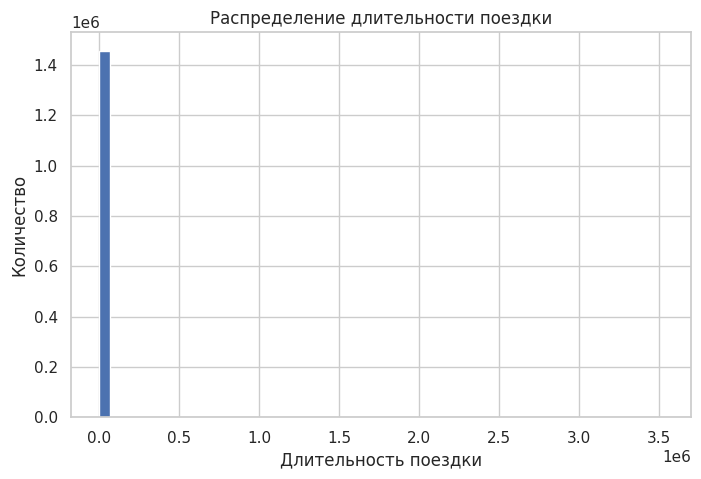

In [7]:
plt.figure(figsize=(8, 5))
plt.hist(x=df['trip_duration'], bins=50)
plt.xlabel('Длительность поездки')
plt.ylabel('Количество')
plt.title('Распределение длительности поездки')
plt.show()

Судя по всему, есть выбросы. Давайте построим график до 99 квантиля, чтобы посмтроеть на распределение без выбросов.

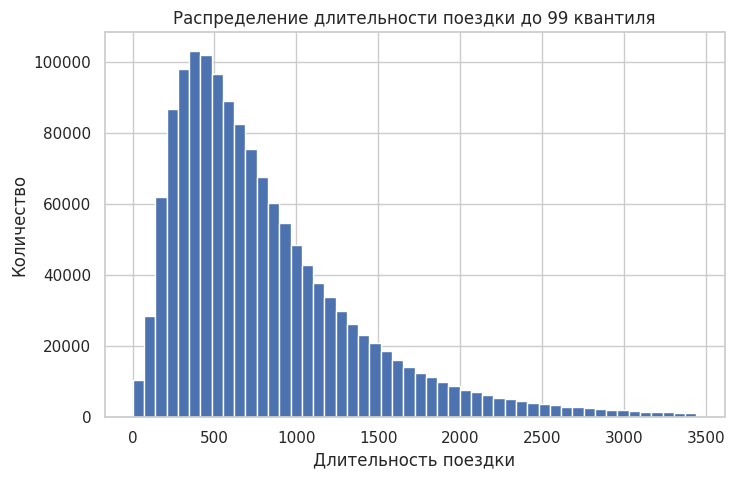

In [8]:
plt.figure(figsize=(8, 5))
plt.hist(x=df[df['trip_duration'] < df['trip_duration'].quantile(0.99)]['trip_duration'], bins=50)
plt.xlabel('Длительность поездки')
plt.ylabel('Количество')
plt.title('Распределение длительности поездки до 99 квантиля')
plt.show()

**Вопрос**: Что можно сказать о целевой переменной по гистограмме её значений?

**Ответ:** Есть выбросы, но если их выкинуть, то целевая переменная имеет лог-нормальное распределение

В соревновании в качестве метрики качества использовалось RMSLE:
$$\text{RMSLE}(X, y, a) = \sqrt{\frac{1}{\ell}\sum_{i=1}^{\ell} \big(\log{(y_i + 1)} - \log{(a(x_i) + 1)}\big)^2}$$

**Вопрос**: Как вы думаете, почему авторы соревнования выбрали именно RMSLE, а не RMSE?

**Ответ:** Потому что распределение целевой переменной лог-нормальное

На семинаре мы рассматривали несколько моделей линейной регрессии в `sklearn`, но каждая из них оптимизировала среднеквадратичную ошибку (MSE), а не RMSLE. Давайте проделаем следующий трюк: будем предсказывать не целевую переменную, а ее *логарифм*. Обозначим $\hat{y}_i = \log{(y_i + 1)}$ — модифицированный таргет, а $\hat{a}(x_i)$ — предсказание модели, которая обучалась на $\hat{y}_i$, то есть логарифм таргета. Чтобы предсказать исходное значение, мы можем просто взять экспоненту от нашего предсказания: $a(x_i) = \exp(\hat{a}(x_i)) - 1$.

**Вопрос**: Покажите, что оптимизация RMSLE для модели $a$ эквивалентна оптимизации MSE для модели $\hat{a}$.

**Доказательство**:
$$
a(x_i) = \exp(\hat{a}(x_i)) - 1 \Rightarrow \hat{a}(x_i) = \log{(a(x_i) + 1)}
$$

$$
\text{RMSLE}(X, y, a) = \sqrt{\frac{1}{\ell}\sum_{i=1}^{\ell} \big(\log{(y_i + 1)} - \log{(a(x_i) + 1)}\big)^2} = \sqrt{\frac{1}{l}\sum_{i=1}^{\ell}(\hat{y}_i - \hat{a}_i)^2} = \text{RMSE}(X, \hat{y}, \hat{a})
$$
Оптимизация RMSE эквивалентна оптимизации MSE, так как корень - это монотонная функция

Итак, мы смогли свести задачу оптимизации RMSLE к задаче оптимизации MSE, которую мы умеем решать! Кроме того, у логарифмирования таргета есть еще одно полезное свойство. Чтобы его увидеть, добавьте к нашей выборке колонку `log_trip_duration` (воспользуйтесь `np.log1p`) и нарисуйте гистограмму модифицированного таргета по обучающей выборке. Удалите колонку со старым таргетом.

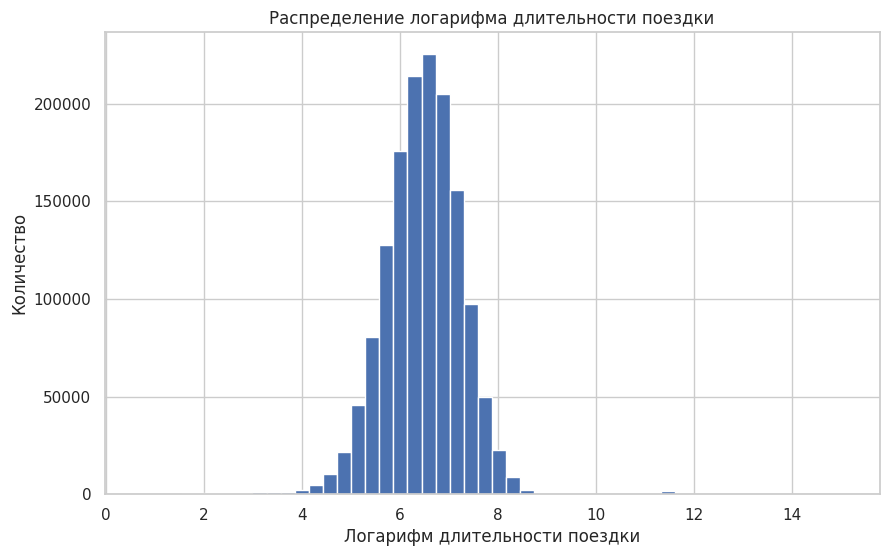

In [9]:
plt.figure(figsize = (10, 6))
df['log_trip_duration'] = np.log1p(df['trip_duration'])
plt.hist(x = df['log_trip_duration'], bins = 50)
plt.title('Распределение логарифма длительности поездки')
plt.xlabel('Логарифм длительности поездки')
plt.ylabel('Количество')
plt.show()

In [10]:
df.drop('trip_duration', axis = 1, inplace = True)

Чтобы иметь некоторую точку отсчета, давайте посчитаем значение метрики при наилучшем константном предсказании:

In [11]:
def rmsle(log1p_y_true, log1p_y_pred):
    return np.sqrt(((log1p_y_true - log1p_y_pred) ** 2).mean())
    raise NotImplementedError

rmsle_best_const = rmsle(df['log_trip_duration'], df['log_trip_duration'].mean())
print(rmsle_best_const)
assert np.allclose(rmsle_best_const, 0.79575, 1e-4)

0.7957592365411509


## Часть 1. Изучаем `pickup_datetime` (2 балла)

**Задание 2 (0.25 баллов)**. Для начала давайте посмотрим, сколько всего было поездок в каждый из дней. Постройте график зависимости количества поездок от дня в году:

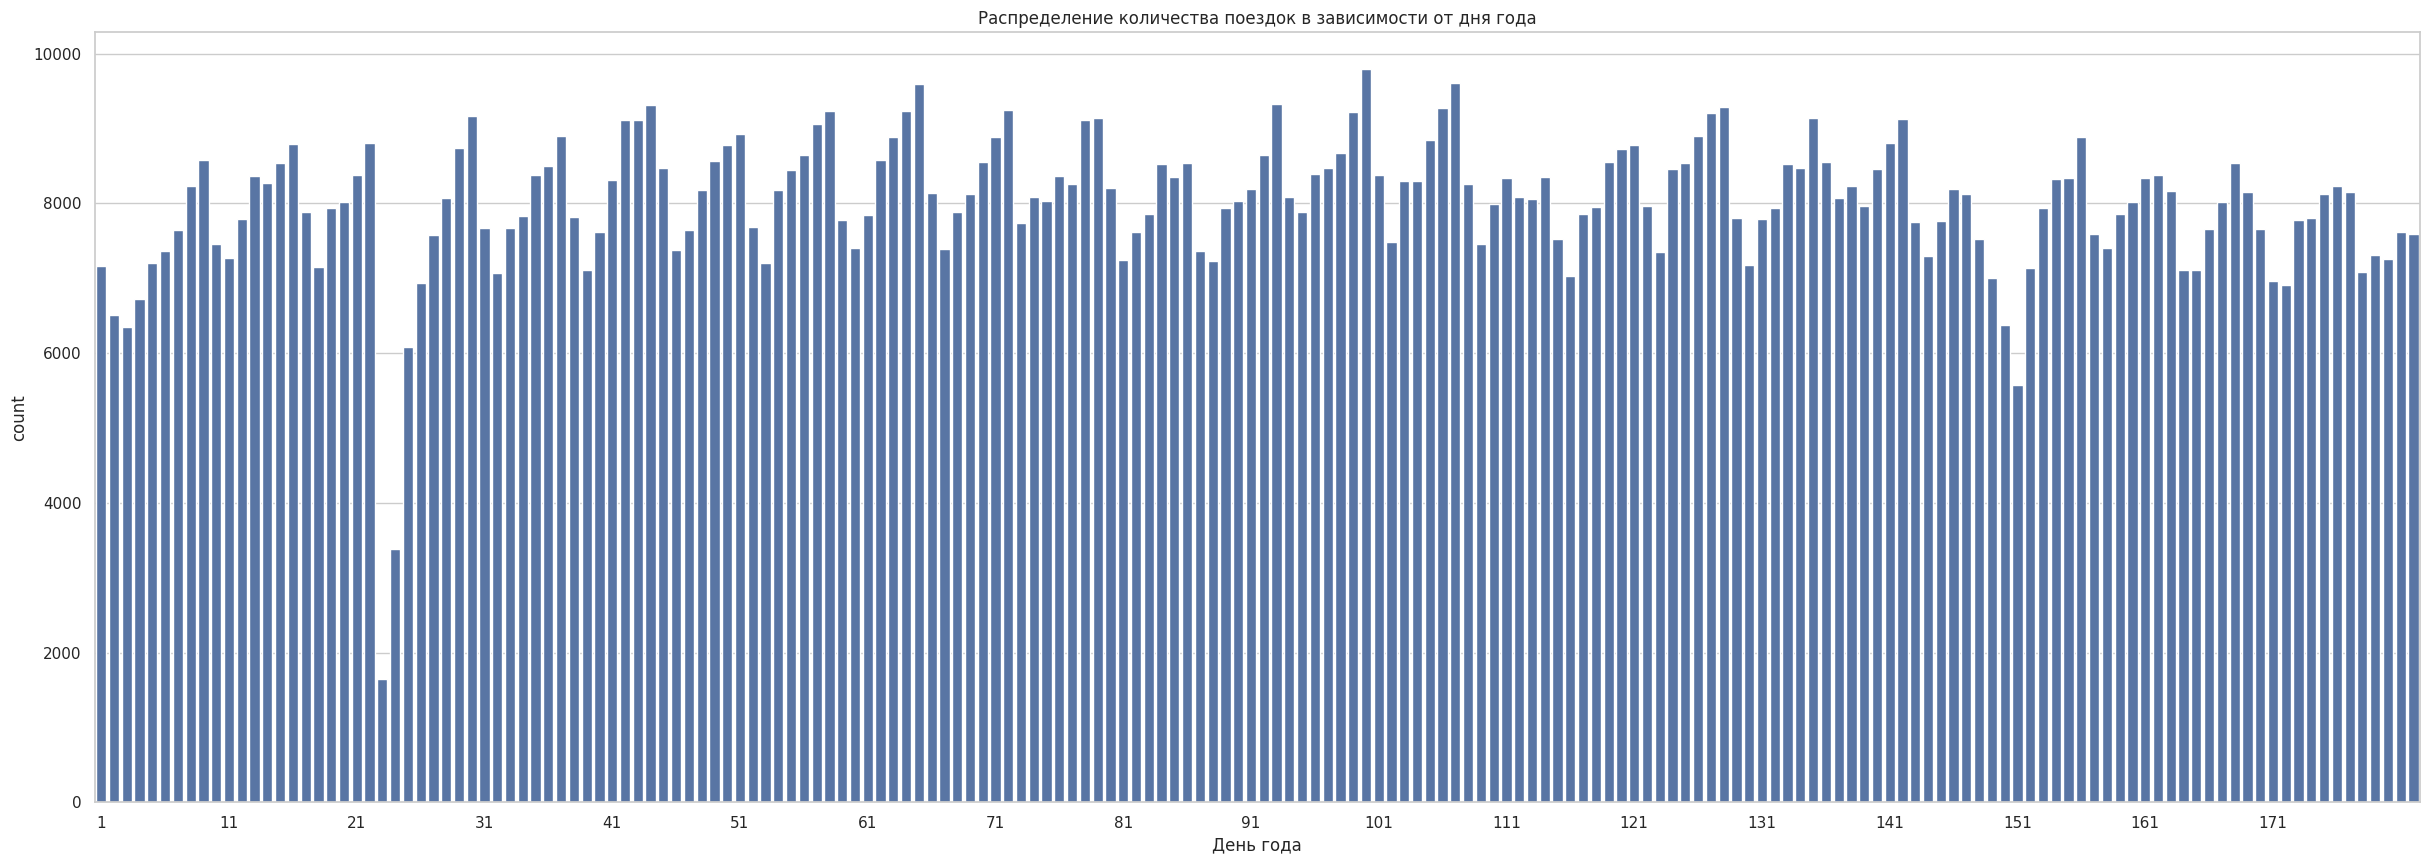

In [12]:
plt.figure(figsize = (30, 10))
sns.countplot(data = df, x = df['pickup_datetime'].dt.dayofyear)
plt.xlabel('День года')
plt.title('Распределение количества поездок в зависимости от дня года')
plt.xticks(range(0, 180, 10))
plt.show()

**Вопрос**: Вы, вероятно, заметили, что на графике есть 2 периода с аномально маленькими количествами поездок. Вычислите, в какие даты происходили эти скачки вниз и найдите информацию о том, что происходило в эти дни в Нью-Йорке.

Нарисуйте графики зависимости количества поездок от дня недели и от часов в сутках:

In [13]:
df[df['pickup_datetime'].dt.dayofyear.isin(pd.DataFrame(df['pickup_datetime'].dt.dayofyear)['pickup_datetime'].value_counts().tail(4).index)]['pickup_datetime'].dt.date.unique()

array([datetime.date(2016, 1, 25), datetime.date(2016, 1, 23),
       datetime.date(2016, 1, 24), datetime.date(2016, 5, 30)],
      dtype=object)

23-24 января была снежная буря, и в Нью-Йорке даже запретели движение автомобилей на какое-то время.

Источник: https://ria.ru/20160123/1364032228.html

30 мая была серия нападений со стрельбой, пострадало 9 человек, и люди наверняка предпочли воздержать от поездок.

Источник: https://tass.ru/proisshestviya/3324970

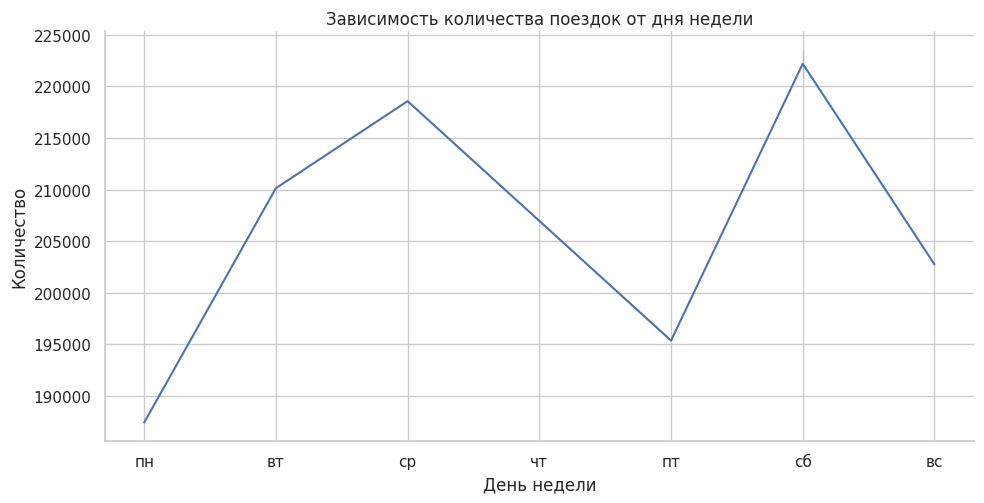

In [14]:
df['day_of_week'] = df['pickup_datetime'].dt.dayofweek
sns.relplot(data=df, x='day_of_week', y=df.groupby('day_of_week').size(), kind='line', aspect=2)
plt.title('Зависимость количества поездок от дня недели')
plt.xlabel('День недели')
plt.ylabel('Количество')
plt.xticks(range(7), ['пн', 'вт', 'ср', 'чт', 'пт', 'сб', 'вс'])
plt.show()

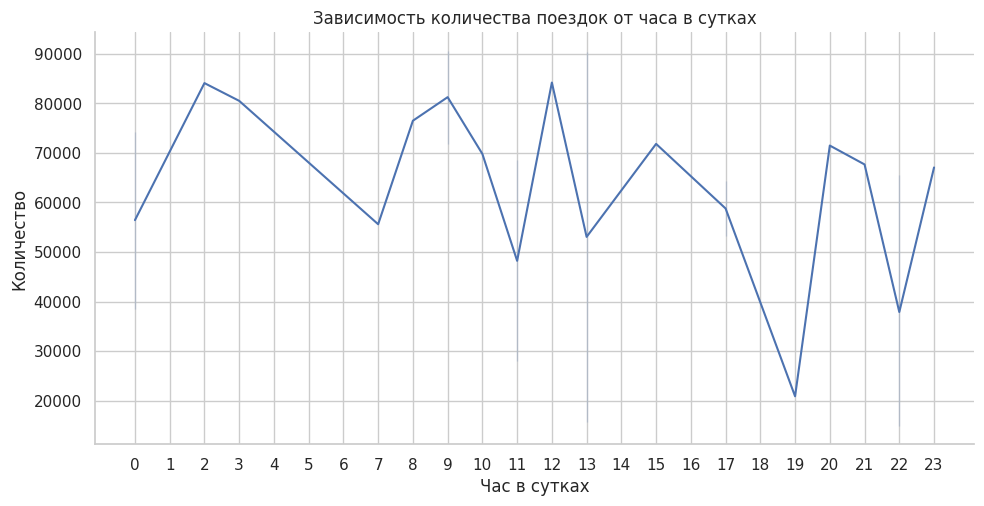

In [15]:
df['hour_of_day'] = df['pickup_datetime'].dt.hour
sns.relplot(data=df, x='hour_of_day', y=df.groupby('hour_of_day').size(), kind='line', aspect=2)
plt.title('Зависимость количества поездок от часа в сутках')
plt.xlabel('Час в сутках')
plt.ylabel('Количество')
plt.xticks(range(24))
plt.show()

**Задание 3 (0.5 баллов)**. Нарисуйте на одном графике зависимости количества поездок от часа в сутках для разных месяцев (разные кривые, соответствующие разным месяцам, окрашивайте в разные цвета, поищите, как это делается). Аналогично нарисуйте зависимости количества поездок от часа в сутках для разных дней недели.

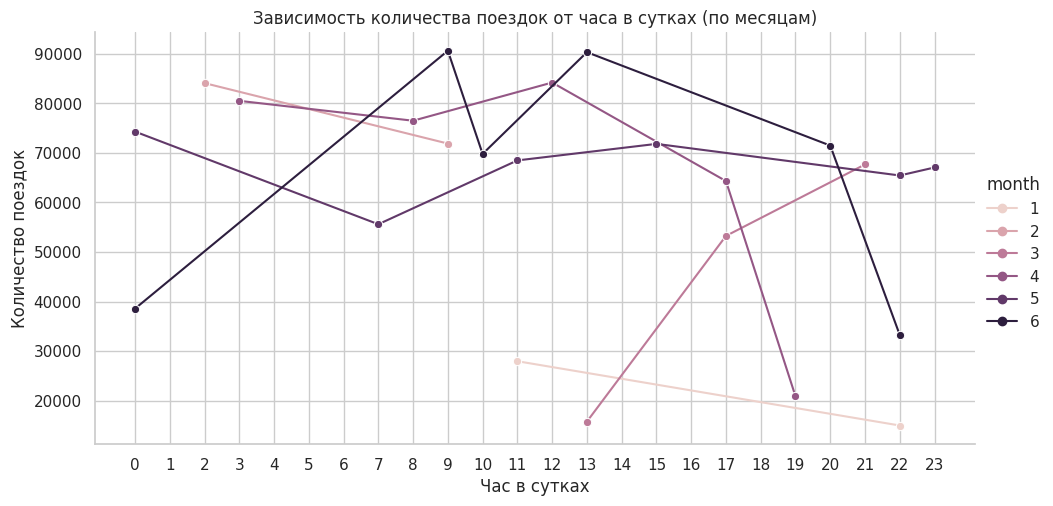

In [16]:
df['month'] = df['pickup_datetime'].dt.month
sns.relplot(data=df, x='hour_of_day', y=df.groupby('hour_of_day').size(), kind='line', marker='o', hue='month', aspect=2)
plt.title('Зависимость количества поездок от часа в сутках (по месяцам)')
plt.xlabel('Час в сутках')
plt.ylabel('Количество поездок')
plt.xticks(range(24))
plt.show()

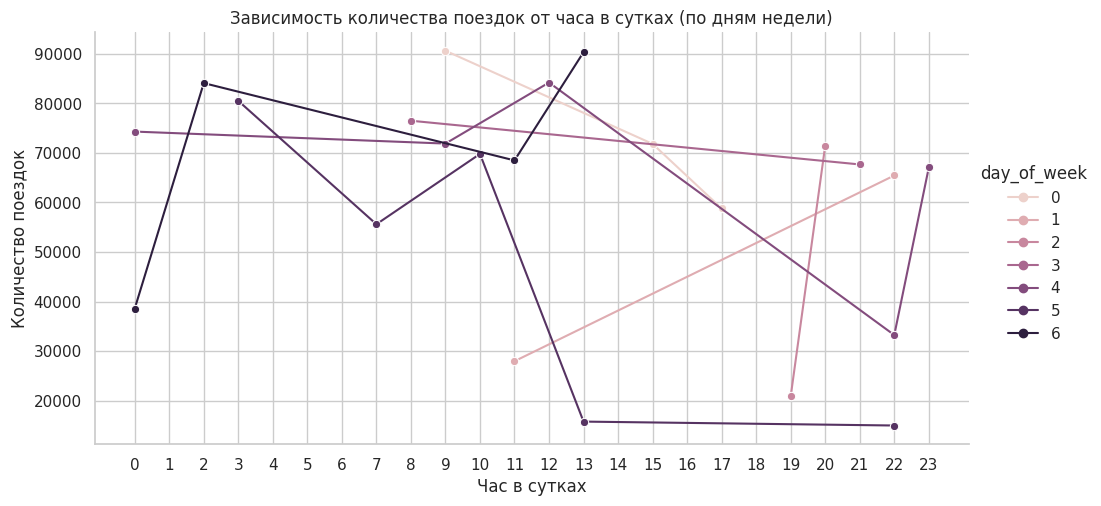

In [17]:
sns.relplot( data=df, x='hour_of_day', y=df.groupby('hour_of_day').size(), kind='line', marker='o', hue='day_of_week', aspect=2)
plt.title('Зависимость количества поездок от часа в сутках (по дням недели)')
plt.xlabel('Час в сутках')
plt.ylabel('Количество поездок')
plt.xticks(range(24))
plt.show()

**Вопрос**: Какие выводы можно сделать, основываясь на графиках выше? Выделяются ли какие-нибудь дни недели? Месяца? Время суток? С чем это связано?

**Ответ**: Больше всего поездок происходит днем в летнее время и/или в выходные дни, так как это самое удобное время для поездок на такси

**Задание 4 (0.5 баллов)**. Разбейте выборку на обучающую и тестовую в отношении 7:3 (используйте `train_test_split` из `sklearn`). По обучающей выборке нарисуйте график зависимости среднего логарифма времени поездки от дня недели. Затем сделайте то же самое, но для часа в сутках и дня в году.

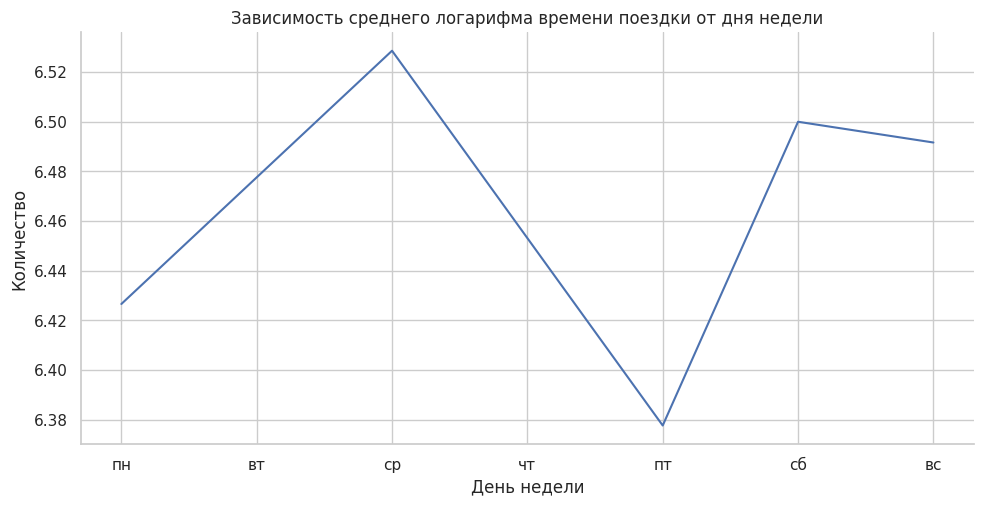

In [18]:
from sklearn.model_selection import train_test_split
df_train, df_test = train_test_split(df, test_size=0.3, random_state=42)

sns.relplot(data=df_train, x='day_of_week', y=df.groupby('day_of_week')['log_trip_duration'].mean(), kind='line', aspect=2)
plt.title('Зависимость среднего логарифма времени поездки от дня недели')
plt.xlabel('День недели')
plt.ylabel('Количество')
plt.xticks(range(7), ['пн', 'вт', 'ср', 'чт', 'пт', 'сб', 'вс'])
plt.show()

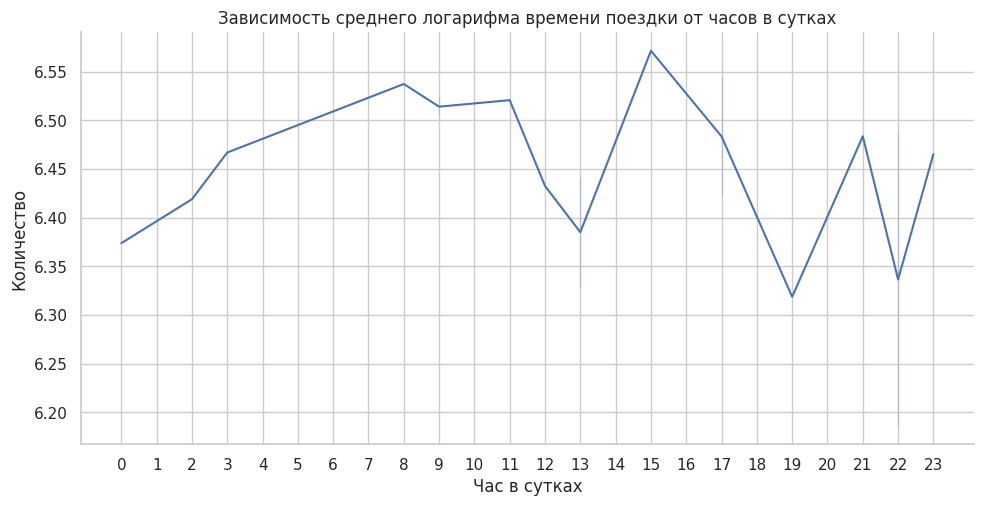

In [19]:
sns.relplot(data=df_train, x='hour_of_day', y=df.groupby('hour_of_day')['log_trip_duration'].mean(), kind='line', aspect=2)
plt.title('Зависимость среднего логарифма времени поездки от часов в сутках')
plt.xlabel('Час в сутках')
plt.ylabel('Количество')
plt.xticks(range(24))
plt.show()

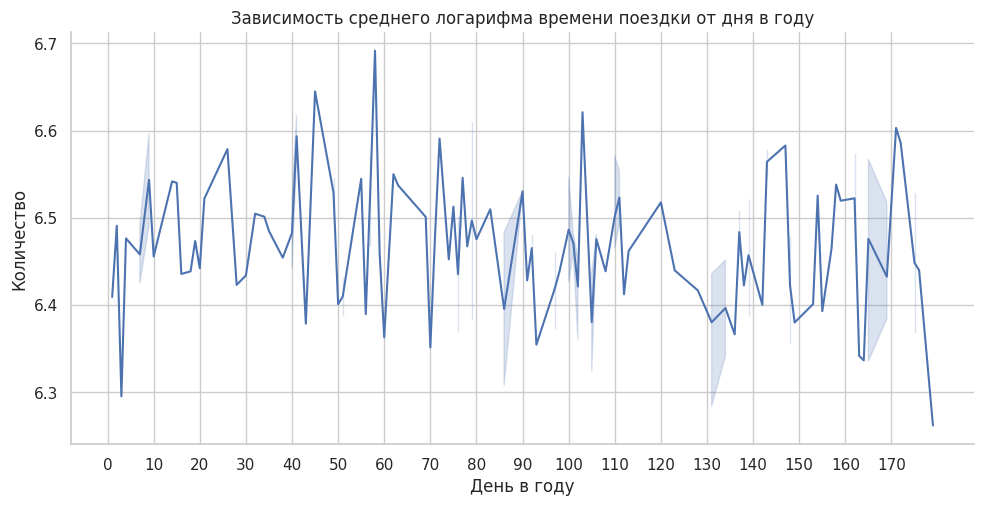

In [20]:
df_train['day_of_year'] = df_train['pickup_datetime'].dt.dayofyear
sns.relplot(data=df_train, x='day_of_year', y=df_train.groupby('day_of_year')['log_trip_duration'].mean(), kind='line', aspect=2)
plt.title('Зависимость среднего логарифма времени поездки от дня в году')
plt.ylabel('Количество')
plt.xlabel('День в году')
plt.xticks(range(0, 180, 10))
plt.show()

**Вопрос**: Похожи ли графики зависимости таргета от дня недели и от часа в сутках на аналогичные графики для количества поездок? Почему? Что происходит со средним таргетом в те два аномальных периода, что мы видели выше? Почему так происходит? Наблюдаете ли вы какой-нибудь тренд на графике зависимости `log_trip_duration` от номера дня в году?

**Ответ**: Графики таргета от дня недели и от часа достаточно похожи на аналогичные графики для количества поездок. Наблюдается схожий тренд, так как чем больше люди ездят, тем более дольше длится поездка из-за высокой загруженности. Во время 1-го аномального периода продолжительность была наибольшая из-за снегопада, движение было затруднено, а также были ограничения на перемещения, и поэтому было слишком долгим. Из-за стрельбы длительность поездок, кажется, не изменилась, только меньше стала.

Сложно определить, есть ли зависимость. Кажется, что нет, так как просто очень много колебаний, и нет ярковыраженного тренда.

Добавьте следующие признаки на основе `pickup_datetime`:
1. День недели
2. Месяц
3. Час
4. Является ли период аномальным (два бинарных признака, соответствующие двум аномальным периодам)
5. Номер дня в году

In [21]:
df.drop(['day_of_week', 'hour_of_day', 'month'], axis = 1, inplace = True)

In [22]:
df['day_of_week'] = df['pickup_datetime'].dt.strftime('%A')
df['month'] = df['pickup_datetime'].dt.strftime('%B')
df['hour_of_day'] = df['pickup_datetime'].dt.hour
df['is_anomal'] = np.where(((df['pickup_datetime'].dt.day).isin([23, 24, 25, 151]) ) & (df['pickup_datetime'].dt.month == 1), 1, 0)
df['day_of_year'] = df['pickup_datetime'].dt.dayofyear
df.head()

,id,vendor_id,pickup_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,log_trip_duration,day_of_week,month,hour_of_day,is_anomal,day_of_year
0,id2875421,2,2016-03-14 17:24:55,1,-73.982155,40.767937,-73.964630,40.765602,N,6.122493,Monday,March,17,0,74
1,id2377394,1,2016-06-12 00:43:35,1,-73.980415,40.738564,-73.999481,40.731152,N,6.498282,Sunday,June,0,0,164
2,id3858529,2,2016-01-19 11:35:24,1,-73.979027,40.763939,-74.005333,40.710087,N,7.661527,Tuesday,January,11,0,19
3,id3504673,2,2016-04-06 19:32:31,1,-74.010040,40.719971,-74.012268,40.706718,N,6.063785,Wednesday,April,19,0,97
4,id2181028,2,2016-03-26 13:30:55,1,-73.973053,40.793209,-73.972923,40.782520,N,6.077642,Saturday,March,13,0,86


Итак, мы уже создали некоторое количество признаков.

**Вопрос**: Какие из признаков _стоит рассматривать в этой задаче_   как категориальные, а какие - как численные? Почему?

**Ответ**: Категориальные - day_of_week, month, hour_of_day, is_anomal, так как последнее - это флаг аномального дня, а первые 3 - порядковые признаки, у которых ограниченное число значений. Признак day_of_year является численным, так как у него 182 значения, и не хочется делать 182 новых признака)

**Задание 5 (0.75 баллов)**. Обучите `Ridge`-регрессию с параметрами по умолчанию, закодировав все категориальные признаки с помощью `OneHotEncoder`. Численные признаки отмасштабируйте с помощью `StandardScaler`. Используйте только признаки, которые мы выделили в этой части задания.

In [23]:
#Все Pipeline точно работают в колабе!

X_train, X_test, y_train, y_test = train_test_split(df.drop('log_trip_duration', axis = 1), df['log_trip_duration'], test_size=0.3, random_state=42)

from sklearn.pipeline import Pipeline
from sklearn.linear_model import Ridge
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

categorical = ['day_of_week', 'month', 'hour_of_day', 'is_anomal']
numeric_features = ['day_of_year']
column_transformer = ColumnTransformer([
    ('ohe', OneHotEncoder(handle_unknown="ignore"), categorical),
    ('scaling', StandardScaler(), numeric_features)
])

ridge_pipeline = Pipeline(steps=[
    ('ohe_and_scaling', column_transformer),
    ('regression', Ridge())
])

model = ridge_pipeline.fit(X_train[['day_of_week', 'month', 'hour_of_day', 'is_anomal', 'day_of_year']], y_train)
y_pred = model.predict(X_test[['day_of_week', 'month', 'hour_of_day', 'is_anomal', 'day_of_year']])
print("Test RMSE = %.4f" % mean_squared_error(y_test, y_pred, squared=False))


Test RMSE = 0.7881


## Часть 2. Изучаем координаты (3 балла)
Мы уже очень хорошо изучили данные о времени начала поездки, давайте теперь посмотрим на информацию о координатах начала и конца поездки. Мы подготовили для вас функцию, которая на карте рисует точки начала или конца поездки. Примеры ее вызова вы найдете ниже. Обратите внимание, что в эту функцию мы передаем лишь небольшой кусочек данных, посколько иначе функция будет работать очень долго

In [24]:
from typing import Iterable

def show_circles_on_map(
    latitude_values: Iterable[float],
    longitude_values: Iterable[float],
    color: str = "blue",
) -> folium.Map:
    """
    The function draws map with circles on it.
    The center of the map is the mean of coordinates passed in data.
    Works best on samples of size < 10k, too costly otherwise

    latitude_values: sample latitude values of a dataframe
    longitude_column: sample longitude values of a dataframe
    color: the color of circles to be drawn
    """

    location = (np.mean(latitude_values), np.mean(longitude_values))
    m = folium.Map(location=location)

    for lat, lon in zip(latitude_values, longitude_values):
        folium.Circle(
            radius=100,
            location=(lat, lon),
            color=color,
            fill_color=color,
            fill=True
        ).add_to(m)

    return m

Напишите функция, которая вернет значения колонок `pickup_latitude`, `pickup_longitude` на каком-нибудь разумном кусочке датафрейма, например, `df.sample(1000)` и покажите на карте, используя `show_circles_on_map`

In [25]:
np.random.seed(42)
data = df.sample(1000)
your_lat_values = data["pickup_latitude"]
your_lon_values = data["pickup_longitude"]
show_circles_on_map(your_lat_values, your_lon_values, color="midnightblue")

In [26]:
data = df.sample(1000)
your_lat_values = data["dropoff_latitude"]
your_lon_values = data["dropoff_longitude"]
show_circles_on_map(your_lat_values, your_lon_values, color="midnightblue")

**Вопрос**: Какие пункты (или скопления точек, в количестве 2-3), по вашему мнению, выделяются на карте от основной массы и могут быть полезны для нашей задачи? Почему вы их выбрали? В чём особенность этих скоплений точек для нашей задачи?

**Ответ**: Выделяются точки рядом с аэропортами, их нельзя отнести к выбросам, так как они имеют свою логику, несмотря на то, что они расположены далеко от центра Нью-Йорка. Для нашей задачи эти точки полезны, так как продолжительность поездок в/из аэропорт будет дольше, чем обычные.

**Задание 6 (0.75 балл)**. Как мы все прекрасно помним, $t = s / v_{\text{ср}}$, поэтому очевидно, что самым сильным признаком будет расстояние, которое необходимо проехать. Мы не можем посчитать точное расстояние, которое необходимо преодолеть такси, но мы можем его оценить, посчитав кратчайшее расстояние между точками начала и конца поездки. Чтобы корректно посчитать расстояние между двумя точками на Земле, можно использовать функцию `haversine`. Также можно воспользоваться кодом с первого семинара. Посчитайте кратчайшее расстояние для объектов и запишите его в колонку `haversine`:

In [27]:
!pip install haversine

In [28]:
from haversine import haversine
def new_haversine(lat1, lon1, lat2, lon2):
    pickup = (lat1, lon1)
    dropoff = (lat2, lon2)
    return haversine(pickup, dropoff)

df['haversine'] = df.apply(lambda row: new_haversine(row['pickup_latitude'], row['pickup_longitude'], row['dropoff_latitude'], row['dropoff_longitude']), axis=1)

Так как мы предсказываем логарифм времени поездки и хотим, чтобы наши признаки были линейно зависимы с этой целевой переменной, нам нужно логарифмировать расстояние: $\log t = \log s - \log{v_{\text{ср}}}$. Запишите логарифм `haversine` в отдельную колонку `log_haversine`:

In [29]:
df['log_haversine'] = np.log1p(df['haversine'])

Посчитайте корреляцию и убедитесь, что логарифм расстояния лучше отражает таргет, чем просто расстояние:

In [30]:
assert df['log_haversine'].corr(df['log_trip_duration']) > df['haversine'].corr(df['log_trip_duration'])

**Задание 7 (0.75 балла)**. Давайте изучим среднюю скорость движения такси. Посчитайте среднюю скорость для каждого объекта обучающей выборки, разделив `haversine` на `trip_duration`, и нарисуйте гистограмму ее распределения

In [31]:
df['avg_speed'] = df['haversine'] / df['log_trip_duration']

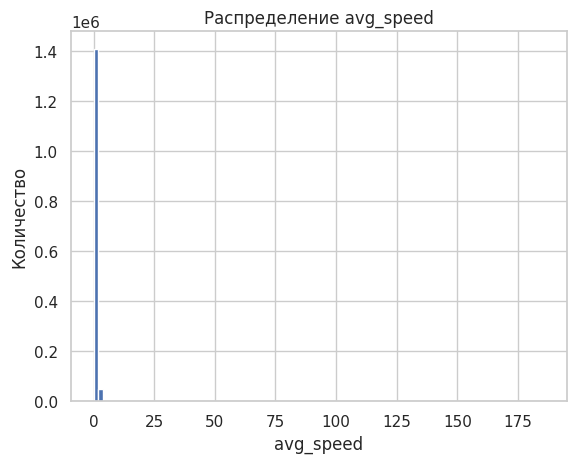

In [32]:
plt.hist(x=df['avg_speed'], bins=100)
plt.title('Распределение avg_speed')
plt.xlabel('avg_speed')
plt.ylabel('Количество')
plt.show()

Как можно видеть по гистограмме, для некоторых объектов у нас получились очень больше значения скоростей. Нарисуйте гистограмму по объектам, для которых значение скорости получилось разумным (например, можно не включать рассмотрение объекты, где скорость больше некоторой квантили):

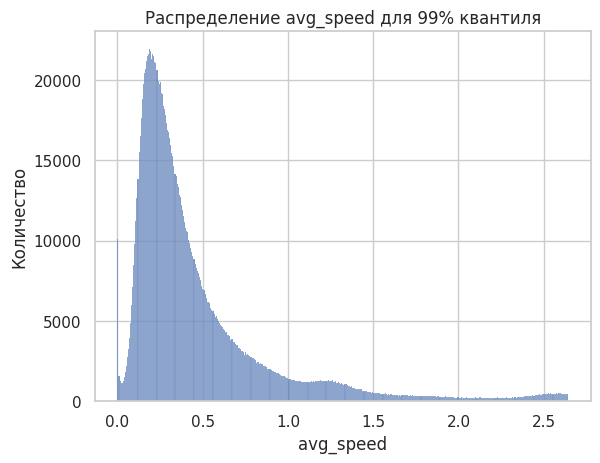

In [33]:
sns.histplot(df[df['avg_speed'] <= np.quantile(df['avg_speed'], 0.99)]['avg_speed'])
plt.title('Распределение avg_speed для 99% квантиля')
plt.xlabel('avg_speed')
plt.ylabel('Количество')
plt.show()

Для каждой пары (день недели, час суток) посчитайте медиану скоростей. Нарисуйте Heatmap-график, где по осям будут дни недели и часы, а в качестве значения функции - медиана скорости

In [34]:
df_avg_speed = pd.DataFrame(df.groupby(['day_of_week', 'hour_of_day'])['avg_speed'].median().unstack())
df_avg_speed

hour_of_day,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
day_of_week,,,,,,,,,,,,,,,,,,,,,
Friday,0.428448,0.425937,0.427848,0.457415,0.540395,0.489602,0.370112,0.321929,0.288001,0.278423,...,0.293918,0.293607,0.302988,0.298831,0.298174,0.302680,0.323743,0.340902,0.356533,0.378854
Monday,0.493154,0.484335,0.465962,0.500407,0.608834,0.489023,0.372548,0.335360,0.296721,0.285248,...,0.294479,0.295687,0.295438,0.298754,0.305309,0.317445,0.359161,0.386656,0.400433,0.446999
Saturday,0.385743,0.403236,0.402498,0.428606,0.478855,0.569976,0.461521,0.388018,0.347083,0.324109,...,0.309941,0.314881,0.316105,0.323832,0.307243,0.304863,0.316551,0.328847,0.341375,0.370036
Sunday,0.382659,0.395154,0.405520,0.430641,0.451329,0.562993,0.535226,0.412907,0.352661,0.335582,...,0.333011,0.332085,0.339842,0.338697,0.335704,0.333891,0.354021,0.374526,0.404131,0.442806
Thursday,0.435138,0.452391,0.475019,0.488740,0.546717,0.449225,0.360403,0.321309,0.283257,0.278178,...,0.282365,0.279437,0.289783,0.294894,0.296949,0.312008,0.344956,0.370631,0.386982,0.411914
Tuesday,0.458989,0.479012,0.468818,0.513820,0.575607,0.421400,0.358985,0.317675,0.278361,0.271297,...,0.279295,0.274091,0.282619,0.295041,0.293457,0.310858,0.351530,0.379086,0.407986,0.428842
Wednesday,0.448020,0.455143,0.454074,0.500205,0.560655,0.432960,0.357944,0.322461,0.283969,0.269882,...,0.277350,0.275758,0.287187,0.296078,0.293725,0.305205,0.345732,0.378831,0.394307,0.423231


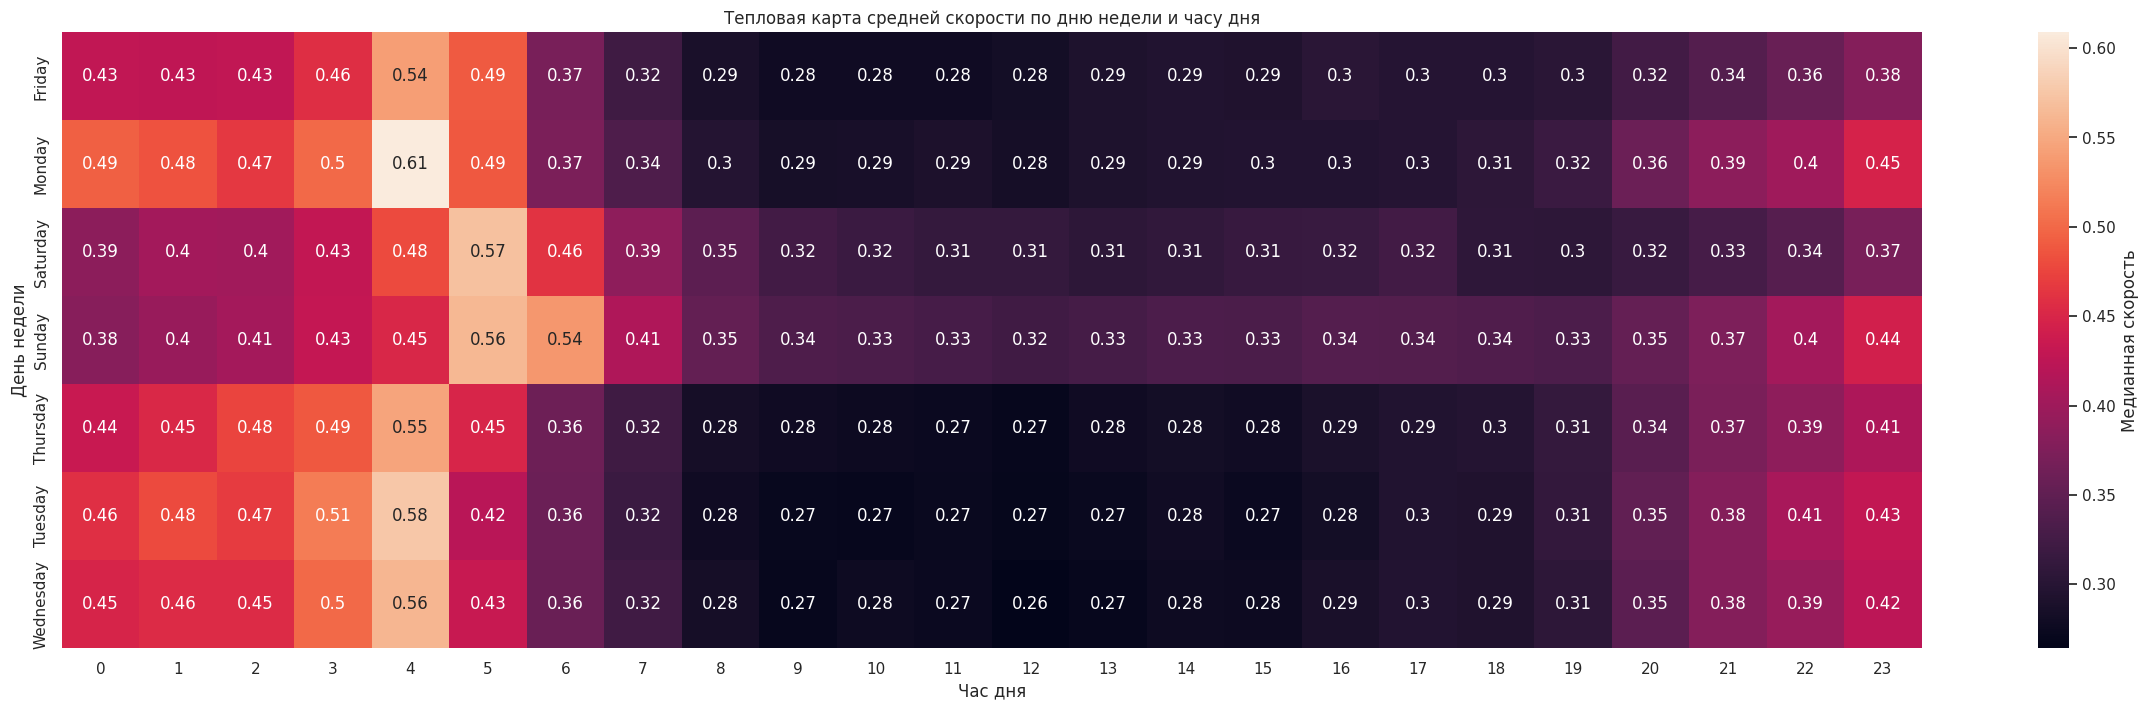

In [35]:
plt.figure(figsize = (30, 8))
sns.heatmap(df_avg_speed, annot=True, cbar_kws={'label': 'Медианная скорость'})
plt.title('Тепловая карта средней скорости по дню недели и часу дня')
plt.xlabel('Час дня')
plt.ylabel('День недели')
plt.show()

Не забудьте удалить колонку со значением скорости из данных!

**Вопрос**: Почему значение скорости нельзя использовать во время обучения?

**Ответ**: Потому что скорость - это расстояние/время, и предсказывать время, зная скорость и расстояния, это бессмысленная задача.

In [36]:
df.drop('avg_speed', axis = 1, inplace = True)

**Вопрос**: Посмотрите внимательно на график и скажите, в какие моменты времени скорость минимальна; максимальна.

**Ответ**: Минимальная скорость c 8 до 19 в будни, а максаимальная в 3-6 часов утра по выходным, а также c полуночи до 5 утра в будни.

Создайте признаки "поездка совершается в период пробок" и "поездка совершается в период свободных дорог" (естественно, они не должен зависеть от скорости!):

In [37]:
df['traffic_jam'] = np.where(df['hour_of_day'].isin([8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]) & df['day_of_week'].isin(['Tuesday', 'Wednesday', 'Thursday', 'Friday']), 1, 0)
df['free_road'] = np.where((df['hour_of_day'].isin([0, 1, 2, 3, 4, 5]) & df['day_of_week'].isin(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday'])) | (df['hour_of_day'].isin([3, 4, 5, 6]) & df['day_of_week'].isin(['Saturday', 'Sunday'])), 1, 0)

**Задание 8 (0.25 балла)**. Для каждого из замеченных вами выше 2-3 пунктов добавьте в выборку по два признака:
- началась ли поездка в этом пункте
- закончилась ли поездка в этом пункте

Как вы думаете, почему эти признаки могут быть полезны?

In [38]:
df['pickup_JK_IntAirport'] = np.where((df['pickup_latitude'] <= 40.6623) & (df['pickup_latitude'] >= 40.6260) & (df['pickup_longitude'] <= -73.7687) & (df['pickup_longitude'] >= -73.8024), 1, 0)
df['dropoff_JK_IntAirport'] = np.where((df['dropoff_latitude'] <= 40.6623) & (df['dropoff_latitude'] >= 40.6260) & (df['dropoff_longitude'] <= -73.7687) & (df['dropoff_longitude'] >= -73.8024), 1, 0)
df['pickup_NYLiberti_Airport'] = np.where((df['pickup_latitude'] <= 40.7072) & (df['pickup_latitude'] >= 40.6704) & (df['pickup_longitude'] <= -74.1565) & (df['pickup_longitude'] >= -74.1903), 1, 0)
df['dropoff_NYLiberti_Airport'] = np.where((df['dropoff_latitude'] <= 40.7072) & (df['dropoff_latitude'] >= 40.6704) & (df['dropoff_longitude'] <= -74.1565) & (df['dropoff_longitude'] >= -74.1903), 1, 0)
df['pickup_LaGuardia_Airport'] = np.where((df['pickup_latitude'] <= 40.7839) & (df['pickup_latitude'] >= 40.7638) & (df['pickup_longitude'] <= -73.8597) & (df['pickup_longitude'] >= -73.88623), 1, 0)
df['dropoff_LaGuardia_Airport'] = np.where((df['dropoff_latitude'] <= 40.7839) & (df['dropoff_latitude'] >= 40.7638) & (df['dropoff_longitude'] <= -73.8597) & (df['dropoff_longitude'] >= -73.88623), 1, 0)

Для каждого из созданных признаков нарисуйте "ящик с усами" (aka boxplot) распределения логарифма времени поездки

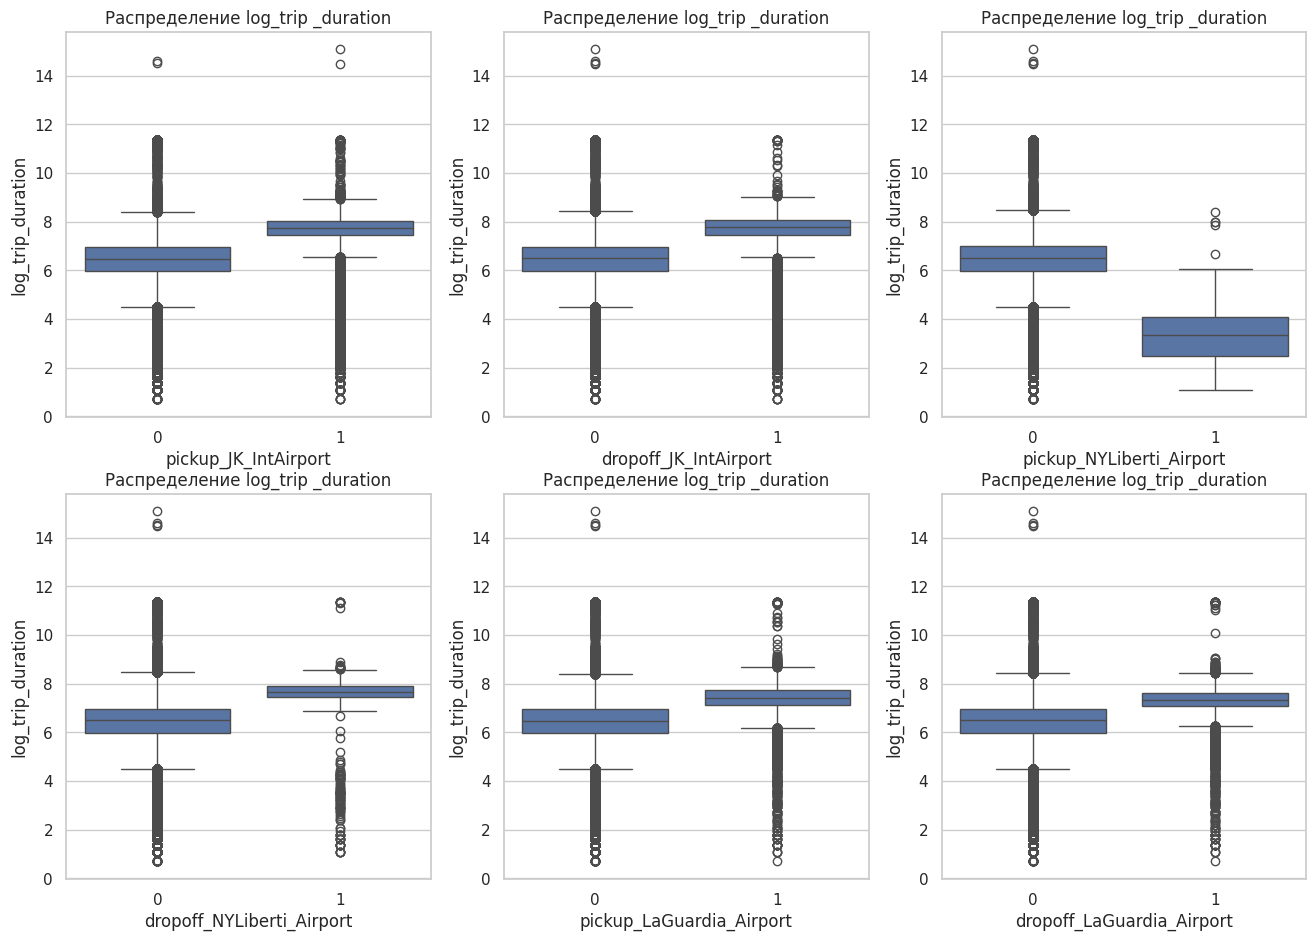

In [39]:
columns =  ['pickup_JK_IntAirport', 'dropoff_JK_IntAirport', 'pickup_NYLiberti_Airport', 'dropoff_NYLiberti_Airport', 'pickup_LaGuardia_Airport', 'dropoff_LaGuardia_Airport']
fig, axes = plt.subplots(2, 3, figsize=(16, 11))
for i, column in enumerate(columns):
    row, col = divmod(i, 3)
    sns.boxplot(y='log_trip_duration', x=column, data=df, ax=axes[row, col])
    axes[row, col].set_title('Распределение log_trip _duration')

**Вопрос**: судя по графикам, как вы думаете, хорошими ли получились эти признаки?

**Ответ**: Признак 'pickup_NYLiberti_ Airport' получился очень хорошим, так как видно, что время поездки при выезде из аэропорта сильно меньше, чем в остальных случаях. Остальные тоже, но разница в них не настолько сильная.

<img src="https://www.dropbox.com/s/xson9nukz5hba7c/map.png?raw=1" align="right" width="20%" style="margin-left: 20px; margin-bottom: 20px">

**Задание 9 (1 балл)**. Сейчас мы почти что не используем сами значения координат. На это есть несколько причин: по отдельности рассматривать широту и долготу не имеет особого смысла, стоит рассматривать их вместе. Во-вторых, понятно, что зависимость между нашим таргетом и координатами не линейная. Чтобы как-то использовать координаты, можно прибегнуть к следующему трюку: обрамим область с наибольшим количеством поездок прямоугольником (как на рисунке). Разобьем этот прямоугольник на ячейки. Каждой точке сопоставим номер ее ячейки, а тем точкам, что не попали ни в одну из ячеек, сопоставим значение -1.

Напишите трансформер, который сначала разбивает показанную на рисунке область на ячейки, а затем создает два признака: номер ячейки, в которой началась поездка, и номер ячейки, в которой закончилась поездка. Количество строк и столбцов выберите самостоятельно.

Обратите внимание, что все вычисления должны быть векторизованными, трансформер не должен модифицировать передаваемую ему выборку inplace, а все необходимые статистики (если они вдруг нужны) нужно считать только по обучающей выборке в методе `fit`:

In [40]:
from sklearn.base import BaseEstimator, TransformerMixin


# TransformerMixin implements fit_transform for you,
# applying your fit and transform consistently

class MapGridTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, nrows, ncols):
        self.nrows = nrows
        self.ncols = ncols
        pass

    def show_map(self):
        return self.m

    def fit(self, X=None, y=None):
        self.max_lat = np.quantile(X['pickup_latitude'], 0.99)
        self.max_long = np.quantile(X['pickup_longitude'], 0.99)
        self.min_lat = np.quantile(X['pickup_latitude'], 0.01)
        self.min_long = np.quantile(X['pickup_longitude'], 0.01)
        self.height = self.max_lat - self.min_lat
        self.width = self.max_long - self.min_long
        self.sec_height = self.height / self.nrows
        self.sec_width = self.width / self.ncols
        return self

    def transform(self, X, y=None):
        X['pickup_sec'] = np.floor((X['pickup_latitude'] - self.min_lat) / self.sec_height) * self.ncols +  np.floor((X['pickup_longitude'] - self.min_long) / self.sec_width + 1)
        X['dropoff_sec'] = np.floor((X['dropoff_latitude'] - self.min_lat) / self.sec_width) * self.ncols +  np.floor((X['dropoff_longitude'] - self.min_long) / self.sec_width + 1)
        X['pickup_sec'] = np.where((X['pickup_sec'] > self.ncols * self.nrows) | (X['pickup_sec'] < 1), -1, X['pickup_sec'])
        X['dropoff_sec'] = np.where((X['dropoff_sec'] > self.ncols * self.nrows) | (X['dropoff_sec'] < 1), -1, X['dropoff_sec'])
        return X

**Задание 10 (0.25 балла)**. Обучите `Ridge`-регрессию со стандартными параметрами на признаках, которые мы выделили к текущему моменту. Категориальные признаки закодируйте через one-hot-кодирование, числовые признаки отмасштабируйте.

In [41]:
transformer = MapGridTransformer(nrows = 4, ncols = 5)

In [42]:
X_train, X_test, y_train, y_test = train_test_split(df.drop('log_trip_duration', axis = 1), df['log_trip_duration'], test_size=0.3, random_state=42)
transformer.fit(X_train)
transformer.transform(df)
transformer.transform(X_train)
transformer.transform(X_test)
categorical = ['day_of_week', 'month', 'hour_of_day', 'is_anomal', 'pickup_sec', 'dropoff_sec']
numeric_features = ['log_haversine', 'day_of_year']
column_transformer = ColumnTransformer([
    ('ohe', OneHotEncoder(handle_unknown="ignore"), categorical),
    ('scaling', StandardScaler(), numeric_features)
])

ridge_pipeline = Pipeline(steps=[
    ('ohe_and_scaling', column_transformer),
    ('regression', Ridge())
])

model = ridge_pipeline.fit(X_train[['log_haversine', 'day_of_year', 'day_of_week', 'month', 'hour_of_day', 'is_anomal', 'pickup_sec', 'dropoff_sec']], y_train)
y_pred = model.predict(X_test[['log_haversine','day_of_year', 'day_of_week', 'month', 'hour_of_day', 'is_anomal', 'pickup_sec', 'dropoff_sec']])
print("Test RMSE = %.4f" % mean_squared_error(y_test, y_pred, squared=False))

Test RMSE = 0.4831


## Часть 3. Изучаем оставшиеся признаки (1 балл)

**Задание 11 (0.75 баллов)**. У нас осталось еще 3 признака, которые мы не исследовали: `vendor_id`, `passenger_count` и `store_and_fwd_flag`.

**Вопрос**: Подумайте, почему каждый из этих признаков может быть потенциально полезным.

**Ответ:** vendor_id - это, как я понял, id организации, которая дала данные по поездке. Этот признак может что-то значить, если у разных организаций разные способы подсчета тех или иных метрик, но мне кажется, такого не может быть и этот признак не является полезным.

passenger_count может влиять, так как если людей больше, то они скорее готовы поехать далеко, так как они будут платить поровну, и в среднем меньше.

store_and_fwd_flag - признак про способ передачи данных. Мне кажется, и этот признак не является полезным, так как вряд ли это может на что-то повлиять.


Посчитайте, сколько есть уникальных значений у каждого из этих признаков:

In [43]:
df['vendor_id'].nunique()

2

In [44]:
df['passenger_count'].nunique()

10

In [45]:
df['store_and_fwd_flag'].nunique()

2

Постройте "ящики с усами" распределений логарифма времени поездки в зависимости от значений каждого из признаков

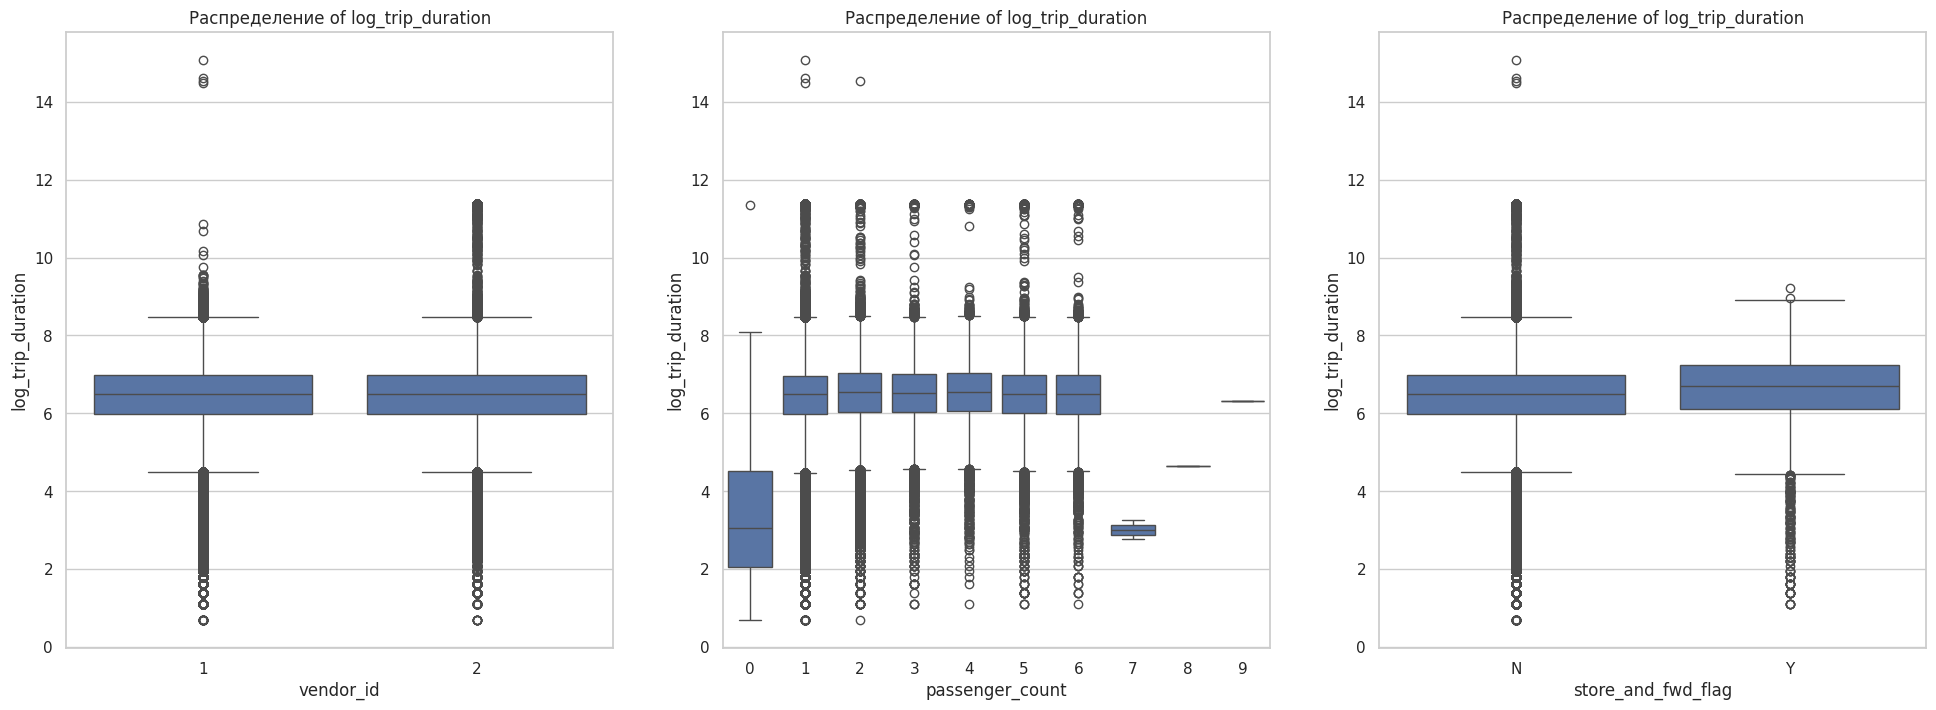

In [46]:
columns =  ['vendor_id', 'passenger_count', 'store_and_fwd_flag']
fig, axes = plt.subplots(1, 3, figsize=(24, 8))
for i, column in enumerate(columns):
    sns.boxplot(y='log_trip_duration', x=column, data=df, ax=axes[i])
    axes[i].set_title('Распределение of log_trip_duration')
plt.show()

Переведите признаки `vendor_id` и `store_and_fwd_flag` в значения $\{0;1\}$

In [47]:
df['vendor_id'] = np.where(df['vendor_id'] == 1, 0, 1)
df['store_and_fwd_flag'] = np.where(df['store_and_fwd_flag'] == 'N', 0, 1)

**Вопрос**: Основываясь на графиках выше, как вы думаете, будут ли эти признаки сильными?

**Ответ**: passenger_count выглядит хоть сколько-то полезным, так как у 0 пассажиров меньше время поездки (видимо, в Нью-Йорке еще не изобрели Яндекс.Доставку, поэтому 0 человек едут в такси), как и у 7-8 пассажиров, хотя в остальном никакой разницы почти нет. Остальные признаки выглядят свов

**Задание 12 (0.25 баллов)**. Проверьте свои предположения, обучив модель в том числе и на этих трех признаках. Обучайте `Ridge`-регрессию со стандартными параметрами. Категориальные признаки закодируйте one-hot-кодированием, а численные отмасштабируйте.

In [48]:
X_train, X_test, y_train, y_test = train_test_split(df.drop('log_trip_duration', axis = 1), df['log_trip_duration'], test_size=0.3, random_state=42)

categorical = ['day_of_week', 'month', 'hour_of_day', 'is_anomal', 'vendor_id', 'store_and_fwd_flag', 'passenger_count', 'pickup_sec', 'dropoff_sec']
numeric_features = ['log_haversine', 'day_of_year']
transformer.fit(X_train)
transformer.transform(X_train)
transformer.transform(X_test)
column_transformer = ColumnTransformer([
    ('ohe', OneHotEncoder(handle_unknown="ignore"), categorical),
    ('scaling', StandardScaler(), numeric_features)
])

ridge_pipeline = Pipeline(steps=[
    ('ohe_and_scaling', column_transformer),
    ('regression', Ridge())
])

model = ridge_pipeline.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("Test RMSE = %.4f" % mean_squared_error(y_test, y_pred, squared=False))

Test RMSE = 0.4827


Если признаки не дали какого-то ощутимого улучшения метрики, их можно выбросить из данных.

RMSE снизился на 0.0004. Улучшение есть, хоть и не ощутимое, поэтому оставлю признаки

## Часть 4. Улучшаем модель (3 балла)

**Задание 13 (1 балл)**. В наших данных есть нетипичные объекты (выбросы, или outliers): с аномально маленьким времени поездки, с очень большим пройденным расстоянием или очень большими остатками регрессии. В этом задании предлагается исключить такие объекты из обучающей выборки. Для этого нарисуйте гистограммы распределения упомянутых выше величин, выберите объекты, которые можно назвать выбросами, и очистите __обучающую выборку__ от них.

Отметим, что хотя эти объекты и выглядят как выбросы, в тестовой выборке тоже скорее всего будут объекты с такими же странными значениями целевой переменной и/или признаков. Поэтому, возможно, чистка обучающей выборки приведёт к ухудшению качества на тесте. Тем не менее, всё равно лучше удалять выбросы из обучения, чтобы модель получалась более разумной и интерпретируемой.

Под обучающей я понимаю весь файл)

Тогда надо сделать предикт по всей обучающей выборке, затем для нее посчитать модуль остатка, как и для тестовой, затем объединить их и затем убрать те, где эта разница слишком большая

In [49]:
y_train_pred=model.predict(X_train)

df_train = X_train.copy()
df_train['log_trip_duration'] = y_train.values
df_train['log_trip_duration_pred'] = y_train_pred
df_train['residuals_abs'] = abs(df_train['log_trip_duration'] - df_train['log_trip_duration_pred'])

y_test_pred = model.predict(X_test)

df_test = X_test.copy()
df_test['log_trip_duration'] = y_test.values
df_test['log_trip_duration_pred'] = y_test_pred
df_test['residuals_abs'] = abs(df_test['log_trip_duration'] - df_test['log_trip_duration_pred'])

df = pd.concat([df_train, df_test], ignore_index=True)

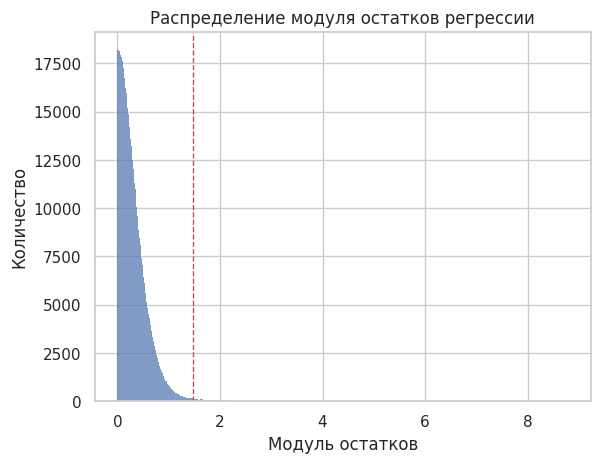

In [50]:
sns.histplot(df['residuals_abs'])
plt.title('Распределение модуля остатков регрессии')
plt.axvline(x=np.quantile(df["residuals_abs"], q = 0.99), color='r', linestyle='--', linewidth=1)
plt.xlabel('Модуль остатков')
plt.ylabel('Количество')
plt.show()

In [51]:
print(f'99% квантиль:{np.quantile(df["residuals_abs"], q = 0.99)}')
df = df[df['residuals_abs'] <= np.quantile(df["residuals_abs"], q = 0.99)]

99% квантиль:1.4732590524603753


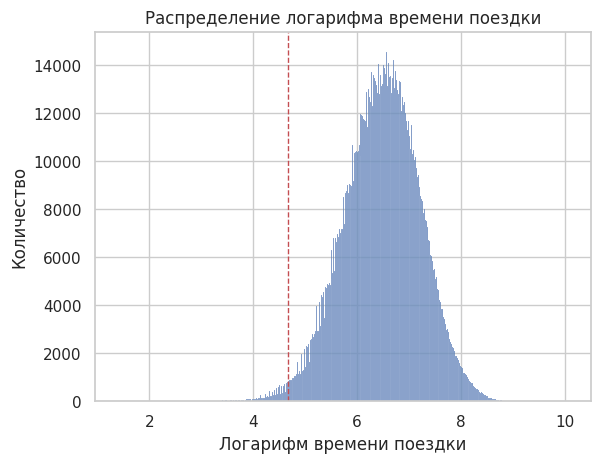

In [52]:
sns.histplot(df['log_trip_duration'])
plt.axvline(x=np.quantile(df["log_trip_duration"], q = 0.01), color='r', linestyle='--', linewidth=1)
plt.title('Распределение логарифма времени поездки')
plt.xlabel('Логарифм времени поездки')
plt.ylabel('Количество')
plt.show()

In [53]:
print(f'1% квантиль: {np.quantile(df["log_trip_duration"], q = 0.01)}')
df = df[(df['log_trip_duration'] > np.quantile(df['log_trip_duration'], q = 0.01))]

1% квантиль: 4.672828834461906


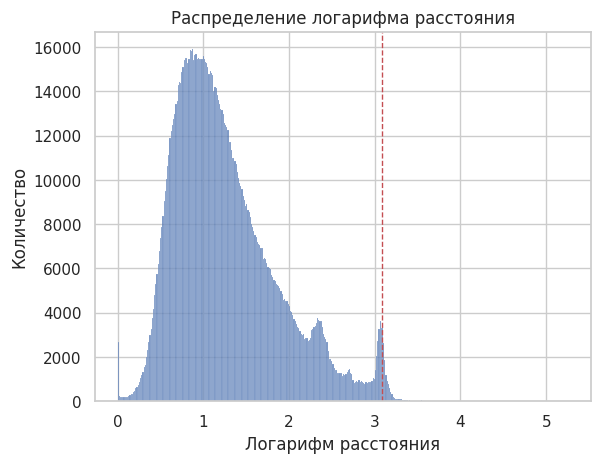

In [54]:
sns.histplot(df['log_haversine'])
plt.axvline(x=np.quantile(df["log_haversine"], q = 0.99), color='r', linestyle='--', linewidth=1)
plt.title('Распределение логарифма расстояния')
plt.xlabel('Логарифм расстояния')
plt.ylabel('Количество')
plt.show()

In [55]:
print(f'99% квантиль:{np.quantile(df["log_haversine"], q = 0.99)}')
df = df[df['log_haversine'] <= np.quantile(df["log_haversine"], q = 0.99)]

99% квантиль:3.082368965518833


Сейчас у нас очень много категориальных признаков. В категориальных признаках могут содержаться редкие категории, обычно это плохо: модель сильно переобучается на таких примерах. Для каждого категориального признака объедините действительно редкие категории в одну, если такие имеются (т.е. если категории действительно редкие).

In [56]:
df

,id,vendor_id,pickup_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,day_of_week,...,dropoff_JK_IntAirport,pickup_NYLiberti_Airport,dropoff_NYLiberti_Airport,pickup_LaGuardia_Airport,dropoff_LaGuardia_Airport,pickup_sec,dropoff_sec,log_trip_duration,log_trip_duration_pred,residuals_abs
0,id2209155,1,2016-05-03 09:03:08,2,-73.979813,40.752529,-73.982681,40.763680,0,Tuesday,...,0,0,0,0,0,11.0,11.0,6.739337,6.312331,0.427005
1,id0586605,0,2016-01-01 16:40:51,1,-73.977623,40.746296,-73.968414,40.788933,0,Friday,...,0,0,0,0,0,11.0,16.0,6.909753,6.998558,0.088805
2,id0467144,0,2016-04-24 13:57:03,1,-73.950699,40.779404,-73.863129,40.768608,0,Sunday,...,0,0,0,0,1,17.0,14.0,6.955593,7.103815,0.148222
3,id0989010,1,2016-01-10 17:03:47,1,-73.984558,40.721802,-73.976753,40.752213,0,Sunday,...,0,0,0,0,0,6.0,11.0,6.665684,6.736066,0.070382
4,id0580742,0,2016-02-25 17:37:36,1,-73.967720,40.768742,-73.977173,40.789875,0,Thursday,...,0,0,0,0,0,17.0,16.0,6.597146,6.395969,0.201176
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1458639,id2411525,0,2016-05-25 17:07:59,2,-73.983505,40.766369,-73.984795,40.785965,0,Wednesday,...,0,0,0,0,0,16.0,16.0,6.717805,6.387615,0.330190
1458640,id3782154,0,2016-06-11 11:18:45,1,-73.968147,40.800476,-73.953979,40.787643,0,Saturday,...,0,0,0,0,0,16.0,17.0,6.163315,6.139325,0.023990
1458641,id0699942,1,2016-05-20 06:30:38,5,-74.006210,40.733158,-73.997932,40.722610,0,Friday,...,0,0,0,0,0,11.0,6.0,6.171701,5.828775,0.342925
1458642,id3422152,0,2016-03-06 22:37:19,2,-73.990089,40.728859,-73.991234,40.765404,0,Sunday,...,0,0,0,0,0,11.0,11.0,7.038784,6.743259,0.295524


In [57]:
df['hour_of_day'] = np.where((df['hour_of_day'] >= 0) & (df['hour_of_day'] <= 7), '0-7', df['hour_of_day'])
df['hour_of_day'].astype(str)

,hour_of_day
0,9
1,16
2,13
3,17
4,17
...,...
1458639,17
1458640,11
1458641,0-7
1458642,22


In [58]:
df.drop(columns=['log_trip_duration_pred', 'residuals_abs'])

,id,vendor_id,pickup_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,day_of_week,...,free_road,pickup_JK_IntAirport,dropoff_JK_IntAirport,pickup_NYLiberti_Airport,dropoff_NYLiberti_Airport,pickup_LaGuardia_Airport,dropoff_LaGuardia_Airport,pickup_sec,dropoff_sec,log_trip_duration
0,id2209155,1,2016-05-03 09:03:08,2,-73.979813,40.752529,-73.982681,40.763680,0,Tuesday,...,0,0,0,0,0,0,0,11.0,11.0,6.739337
1,id0586605,0,2016-01-01 16:40:51,1,-73.977623,40.746296,-73.968414,40.788933,0,Friday,...,0,0,0,0,0,0,0,11.0,16.0,6.909753
2,id0467144,0,2016-04-24 13:57:03,1,-73.950699,40.779404,-73.863129,40.768608,0,Sunday,...,0,0,0,0,0,0,1,17.0,14.0,6.955593
3,id0989010,1,2016-01-10 17:03:47,1,-73.984558,40.721802,-73.976753,40.752213,0,Sunday,...,0,0,0,0,0,0,0,6.0,11.0,6.665684
4,id0580742,0,2016-02-25 17:37:36,1,-73.967720,40.768742,-73.977173,40.789875,0,Thursday,...,0,0,0,0,0,0,0,17.0,16.0,6.597146
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1458639,id2411525,0,2016-05-25 17:07:59,2,-73.983505,40.766369,-73.984795,40.785965,0,Wednesday,...,0,0,0,0,0,0,0,16.0,16.0,6.717805
1458640,id3782154,0,2016-06-11 11:18:45,1,-73.968147,40.800476,-73.953979,40.787643,0,Saturday,...,0,0,0,0,0,0,0,16.0,17.0,6.163315
1458641,id0699942,1,2016-05-20 06:30:38,5,-74.006210,40.733158,-73.997932,40.722610,0,Friday,...,0,0,0,0,0,0,0,11.0,6.0,6.171701
1458642,id3422152,0,2016-03-06 22:37:19,2,-73.990089,40.728859,-73.991234,40.765404,0,Sunday,...,0,0,0,0,0,0,0,11.0,11.0,7.038784


Обучите модель на очищенных данных и посчитайте качество на тестовой выборке.

In [59]:
X_train, X_test, y_train, y_test = train_test_split(df.drop('log_trip_duration', axis = 1), df['log_trip_duration'], test_size=0.3, random_state=42)
categorical = ['day_of_week', 'month', 'hour_of_day', 'is_anomal', 'vendor_id', 'store_and_fwd_flag', 'passenger_count', 'pickup_sec', 'dropoff_sec']
numeric_features = ['log_haversine', 'day_of_year']
transformer.fit(X_train)
transformer.transform(X_train)
transformer.transform(X_test)
column_transformer = ColumnTransformer([
    ('ohe', OneHotEncoder(handle_unknown="ignore"), categorical),
    ('scaling', StandardScaler(), numeric_features)
])

ridge_pipeline = Pipeline(steps=[
    ('ohe_and_scaling', column_transformer),
    ('regression', Ridge())
])

model = ridge_pipeline.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("Test RMSE = %.4f" % mean_squared_error(y_test, y_pred, squared=False))

Test RMSE = 0.3856


Качество стало сильно лучше

**Задание 14 (1 балл)**. После OneHot-кодирования количество признаков в нашем датасете сильно возрастает. Посчитайте колиество признаков до и после кодирования категориальных признаков.

In [60]:
transformer = column_transformer.fit(X_train)
print("Size before OneHot:", X_train.shape[1])
print("Size after OneHot:", transformer.transform(X_train).shape[1])

Size before OneHot: 28
Size after OneHot: 87


Попробуйте обучить не `Ridge`-, а `Lasso`-регрессию. Какой метод лучше?

In [61]:
from sklearn.linear_model import Lasso

categorical = ['day_of_week', 'month', 'hour_of_day', 'is_anomal', 'vendor_id', 'store_and_fwd_flag', 'passenger_count', 'pickup_sec', 'dropoff_sec']
numeric_features = ['log_haversine', 'day_of_year']
transformer.fit(X_train)
transformer.transform(X_train)
transformer.transform(X_test)
column_transformer = ColumnTransformer([
    ('ohe', OneHotEncoder(handle_unknown="ignore"), categorical),
    ('scaling', StandardScaler(), numeric_features)
])

lasso_pipeline = Pipeline(steps=[
    ('ohe_and_scaling', column_transformer),
    ('regression', Lasso())
])

model = lasso_pipeline.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("Test RMSE = %.4f" % mean_squared_error(y_test, y_pred, squared=False))

Test RMSE = 0.6902


Лассо сильно хуже, чем ридж

Разбейте _обучающую выборку_ на обучающую и валидационную в отношении 8:2. По валидационной выборке подберите оптимальные значения параметра регуляризации (по логарифмической сетке) для `Ridge` и `Lasso`, на тестовой выборке измерьте качество лучшей полученной модели.

Дисклеймер: да, я использовал циклы. Но подбор через tqdm быстрее, чем через CVGridSearch

In [62]:
from tqdm import tqdm

X_train_train, X_val, y_train_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)
transformer.fit(X_train_train)
transformer.transform(X_train_train)
transformer.transform(X_val)
categorical = ['day_of_week', 'month', 'hour_of_day', 'traffic_jam', 'is_anomal', 'free_road', 'pickup_JK_IntAirport', 'dropoff_JK_IntAirport', 'pickup_NYLiberti_Airport', 'dropoff_NYLiberti_Airport', 'pickup_LaGuardia_Airport', 'dropoff_LaGuardia_Airport', 'vendor_id', 'passenger_count', 'store_and_fwd_flag' , 'pickup_sec', 'dropoff_sec']
numeric_features = ['log_haversine', 'day_of_year']

column_transformer = ColumnTransformer([
    ('ohe', OneHotEncoder(handle_unknown="ignore"), categorical),
    ('scaling', StandardScaler(), numeric_features)
])

In [63]:
lasso_mse = []
zeros = []
alphas = np.logspace(-3, 3, 20)
for alpha in tqdm(alphas):
  lasso_pipeline = Pipeline(steps=[
      ('ohe_and_scaling', column_transformer),
      ('regression', Lasso(alpha = alpha))
  ])
  model = lasso_pipeline.fit(X_train_train, y_train_train)
  y_pred = model.predict(X_val)
  zeros.append(np.sum(model.named_steps["regression"].coef_ == 0))
  lasso_mse.append( mean_squared_error(y_val, y_pred, squared=False))

100%|██████████| 20/20 [02:59<00:00,  8.97s/it]


In [64]:
ridge_mse = []
for alpha in tqdm(alphas):
  lasso_pipeline = Pipeline(steps=[
      ('ohe_and_scaling', column_transformer),
      ('regression', Ridge(alpha = alpha))
  ])
  model = lasso_pipeline.fit(X_train_train, y_train_train)
  y_pred = model.predict(X_val)
  ridge_mse.append( mean_squared_error(y_val, y_pred, squared=False))

100%|██████████| 20/20 [03:11<00:00,  9.57s/it]


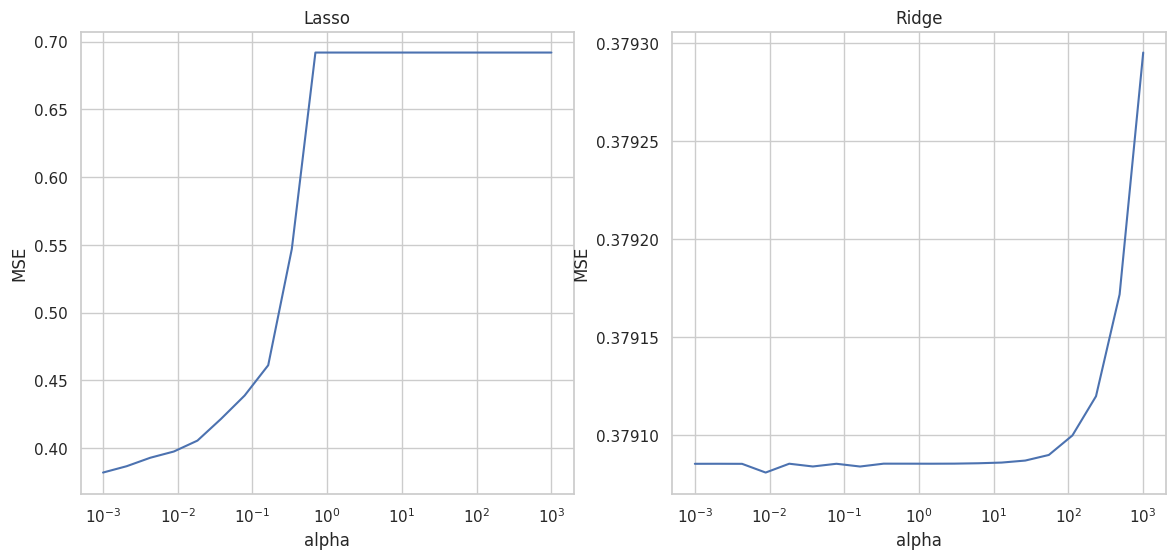

In [65]:
plt.figure(figsize = (14, 6))
plt.subplot(1, 2, 1)
plt.plot(alphas, lasso_mse)
plt.title("Lasso")
plt.xlabel('alpha')
plt.xscale("log")
plt.ylabel('MSE')
plt.subplot(1, 2, 2)
plt.plot(alphas, ridge_mse)
plt.title("Ridge")
plt.xlabel('alpha')
plt.xscale("log")
plt.ylabel('MSE')
plt.show()

Сохраните наилучшее значение, как бенчмарк на будущее

In [66]:
print(f'regression: Lasso, optimal alpha: {alphas[np.argmin(lasso_mse)]}, minimal RMSE: {np.min(lasso_mse)}')
print(f'regression: Ridge, optimal alpha: {alphas[np.argmin(ridge_mse)]}, minimal RMSE: {np.min(ridge_mse)}')

regression: Lasso, optimal alpha: 0.001, minimal RMSE: 0.3819801741507871
regression: Ridge, optimal alpha: 0.008858667904100823, minimal RMSE: 0.3790807172102461


In [67]:
best_rmsle_lasso = (alphas[np.argmin(lasso_mse)], np.min(lasso_mse))
best_rmsle_ridge = (alphas[np.argmin(ridge_mse)], np.min(ridge_mse))

Для каждого перебранного `alpha` для Lasso посчитайте количество нулевых весов в модели и нарисуйте график зависимости его от `alpha`. Как сильно придётся потерять в качестве, если мы хотим с помощью Lasso избавиться хотя бы от половины признаков?

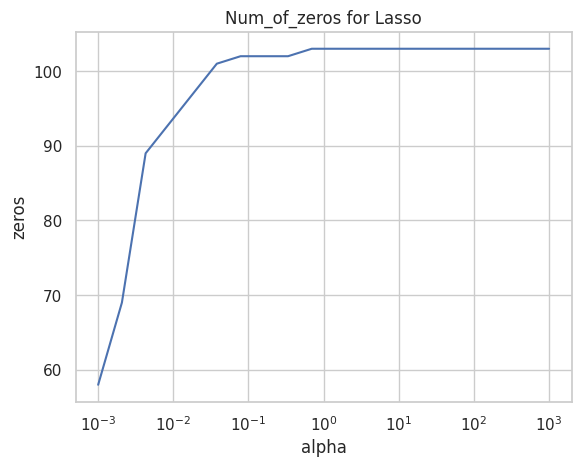

In [68]:
plt.plot(alphas, zeros)
plt.title("Num_of_zeros for Lasso")
plt.xlabel('alpha')
plt.xscale("log")
plt.ylabel('zeros')
plt.show()

In [69]:
zeros[0]

58

У нас всего 87 признаков получается после OHE. И при alpha=0.001 зануляется уже 59, что больше половины. То есть, нам не надо терять в качестве, чтобы занулить половину признаков.

<img src="https://www.dropbox.com/s/wp4jj0599np17lh/map_direction.png?raw=1" width="20%" align="right" style="margin-left: 20px">

**Задание 15 (1 балл)**. Часто бывает полезным использовать взаимодействия признаков (feature interactions), то есть строить новые признаки на основе уже существующих. Выше мы разбили карту Манхэттена на ячейки и придумали признаки "из какой ячейки началась поездка" и "в какой ячейке закончилась поездка".

Давайте попробуем сделать следующее: посчитаем, сколько раз встречается каждая возможная пара этих признаков в нашем датасете и выберем 100 самых частых пар. Закодируем поездки с этими частыми парами как категориальный признак, остальным объектам припишем -1. Получается, что мы закодировали, откуда и куда должно было ехать такси.

**Вопрос**: Почему такой признак потенциально полезный? Почему линейная модель не может самостоятельно "вытащить" эту информацию, ведь у нее в распоряжении есть признаки "из какой ячейки началась поездка" и "в какой ячейке закончилась поездка"?

In [70]:
df['pair'] = list(zip(df['pickup_sec'], df['dropoff_sec']))
df.head()

,id,vendor_id,pickup_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,day_of_week,...,pickup_NYLiberti_Airport,dropoff_NYLiberti_Airport,pickup_LaGuardia_Airport,dropoff_LaGuardia_Airport,pickup_sec,dropoff_sec,log_trip_duration,log_trip_duration_pred,residuals_abs,pair
0,id2209155,1,2016-05-03 09:03:08,2,-73.979813,40.752529,-73.982681,40.763680,0,Tuesday,...,0,0,0,0,11.0,11.0,6.739337,6.312331,0.427005,"(11.0, 11.0)"
1,id0586605,0,2016-01-01 16:40:51,1,-73.977623,40.746296,-73.968414,40.788933,0,Friday,...,0,0,0,0,11.0,16.0,6.909753,6.998558,0.088805,"(11.0, 16.0)"
2,id0467144,0,2016-04-24 13:57:03,1,-73.950699,40.779404,-73.863129,40.768608,0,Sunday,...,0,0,0,1,17.0,14.0,6.955593,7.103815,0.148222,"(17.0, 14.0)"
3,id0989010,1,2016-01-10 17:03:47,1,-73.984558,40.721802,-73.976753,40.752213,0,Sunday,...,0,0,0,0,6.0,11.0,6.665684,6.736066,0.070382,"(6.0, 11.0)"
4,id0580742,0,2016-02-25 17:37:36,1,-73.967720,40.768742,-73.977173,40.789875,0,Thursday,...,0,0,0,0,17.0,16.0,6.597146,6.395969,0.201176,"(17.0, 16.0)"


In [71]:
df['pair'] = str(np.where(df['pair'].isin(list(df['pair'].value_counts().head(100).index)), df['pair'], -1))

Заново обучите модель (`Ridge`, если она дала более высокое качество в предыдущих экспериментах, и `Lasso` иначе) на новых даннных и посчитайте качество на тестовой выборке

In [72]:
X_train, X_test, y_train, y_test = train_test_split(df.drop('log_trip_duration', axis = 1), df['log_trip_duration'], test_size=0.3, random_state=42)
categorical = ['day_of_week', 'month', 'hour_of_day', 'is_anomal', 'vendor_id', 'store_and_fwd_flag', 'passenger_count', 'pickup_sec', 'dropoff_sec', 'pair']
numeric_features = ['log_haversine', 'day_of_year']

column_transformer = ColumnTransformer([
    ('ohe', OneHotEncoder(handle_unknown="ignore"), categorical),
    ('scaling', StandardScaler(), numeric_features)
])

ridge_pipeline = Pipeline(steps=[
    ('ohe_and_scaling', column_transformer),
    ('regression', Ridge(alpha = alphas[np.argmin(ridge_mse)]))
])

model = ridge_pipeline.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("RMSE = %.4f" % mean_squared_error(y_test, y_pred, squared=False))

RMSE = 0.3855


**Задание 16 (бонус, 1 балл)**. Где, как не для нашей задачи, считать манхэттенское расстояние?

**Вопрос**: Найдите, что такое манхэттенское расстояние и почему оно так называется. Как оно нам может помочь?

**Ответ**: Манхэттенское расстояние - расстояние, которое считается по формуле $$|x_1 - x_2| + |y_1 - y_2|$$ Называется так, потому что в главном районе Нью-Йорка, Манхэттене, все кварталы имеют вид прямоугольников, и никак нельзя проехать по диагонали, а значит просто надо ехать |x_1 - x_2|, а потом |y_1 - y_2|. Тут оно может помочь, потому что очень много поездок именно внутри этого района, а значит данное расстояние более справедливо для нашей задачи в большинстве случаев.

Введите систему координат на нашей карте так, чтобы оси были параллельны улицам Манхэттена, и добавьте сначала в данные признак "манхэттенское расстояние между пунктом отправления и пунктом назначения", а затем и логарифм этого признака. Посчитайте корреляцию между вашим новыми признаком и таргетом; между `log_haversine` и таргетом. В каком случае корреляция больше?

Нарисуйте карту, где покажете выбранные оси. Чтобы мы могли проверить вашу работу, просьба сделать скрин этой карты и приложить картинку (если мы откроем ваш ноутбук, виджеты отображаться не будут).

In [ ]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ

Заново обучите модель на новых даннных и посчитайте качество на тестовой выборке. Стало ли лучше? Объясните полученный результат.

In [ ]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ

**Задание 17 (бонус, 2 балла)**.

Разумеется, погружаться в feature engineering можно ещё очень долго. Ваша задача - придумать какие-то новые признаки, которые сделают модель ещё лучше!! За улучшение функционала ошибки на каждые 0.005 на тестовой выборке относительно `best_rmsle` будет даваться 0.5 бонусных балла. Всего за этот пункт можно получить до 2 бонусных баллов.

При построении признаков старайтесь не допустить утечки целевой переменной (подробнее про это можно почитать в материалах 1-го семинара) — в противном случае хорошего качества на тестовой выборке достичь не получится.

Какие могут быть идеи для вдохновения:

1. Трансформер, который строит разбиение карты по шестигранной решётке с помощью библиотеки [H3](https://github.com/uber/h3-py) и вычисляет признаки на основе такого разбиения, по аналогии с квадратной сеткой  
> Важно: производительность библиотеки существенно зависит от количества шестиугольников на карте (определяется параметром resolution). Подберите такое разрешение, при котором ваш код будет работать за приемлемое время.    

2. Мы пока что никак не использовали историчность и взаимосвязь в данных, хотя информация о том, что было ранее в эти/похожие дни тоже может пригодиться. Попробуйте поискать соседей и/или построить агрегации, например, при помощи groupby, посчитайте какие-либо статистики в пределах какого-то окна (подберите всё это сами, постарайтесь, чтобы это было что-то разумное), и присоедините к основному датафрейму
> Важно: учтите, что разных вариантов агрегаций и статистик существует очень много. Не стесняйтесь выкидывать фичи, которые вам не нравятся (помните про свойство Lasso), используйте эффективные способы хранения данных ([wink](https://www.kaggle.com/code/demche/polars-memory-usage-optimization)-[wink](https://docs.scipy.org/doc/scipy/reference/sparse.html))

3. В конце концов можно использовать альтернативные способы преобразования данных. Например, использовать другой scaler, другую кодировку категориальных фичей, другие гиперпараметры и пр. Но помните, что на данный момент мы ограничены только `Ridge` и `Lasso`

In [ ]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ

Вставьте картинку, описывающую ваш опыт выполнения этого ДЗ.

<a href="https://imgbb.com/"><img src="https://i.ibb.co/bQbCR3y/m1emlol-by-fstikbot-agadrxqaaqmhiug-Ag-ADrx-QAAq-Mh-IUg.gif" alt="m1emlol-by-fstikbot-agadrxqaaqmhiug-Ag-ADrx-QAAq-Mh-IUg" border="0"></a>